## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Поздравляю тебя с первым твоим проектом и спасибо, что вовремя сдал задание:) Ты проделал большую работу. Далее в файле мои коммефнтарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [90]:
import pandas as pd
data=pd.read_csv('/datasets/data.csv')
print(data.head(20))
#print(data.tail(20))
#print(data.info())
#print(data.columns)

    children  days_employed  dob_years            education  education_id  \
0          1   -8437.673028         42               высшее             0   
1          1   -4024.803754         36              среднее             1   
2          0   -5623.422610         33              Среднее             1   
3          3   -4124.747207         32              среднее             1   
4          0  340266.072047         53              среднее             1   
5          0    -926.185831         27               высшее             0   
6          0   -2879.202052         43               высшее             0   
7          0    -152.779569         50              СРЕДНЕЕ             1   
8          2   -6929.865299         35               ВЫСШЕЕ             0   
9          0   -2188.756445         41              среднее             1   
10         2   -4171.483647         36               высшее             0   
11         0    -792.701887         40              среднее             1   

In [91]:
#количество строк, в которых есть заглавные буквы
data['education'].str.isupper().sum()
data[data['days_employed']<0].count()
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [92]:
#Переводим всё в нижний регистр для анализа данных
data['education']=data['education'].str.lower()
data['family_status']=data['family_status'].str.lower()

In [93]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [94]:
#Смотрим на строки с пропусками
#data.loc[data['days_employed'].isnull()]['education'].value_counts()

### Вывод

- Размер файла: файл содержит 21525 записей о клиентах. Каждая запись включает в себя 12 атрибутов
- Обнаруженные пропуски: в 2174 записях обнаружены пропуски в столбцах days_employed и total_income (может это безработные?)
- Наименование столбцов: лишних пробелов не обнаружено
- Наличие отрицательных значений не допускается
- Может надо о чём-то ещё упомянуть?

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошее начало, так же, для большего понимания данных можно было бы использовать метод `describe`


### Шаг 2. Предобработка данных

### Обработка пропусков

In [95]:
#Да-да, синтаксический сахар очень нужная вещь
#Заполняем пропуски по стажу
def fill_days_employed(row):
    if pd.isnull(row['days_employed']):
        if row['income_type']=='безработный':
            return median_values['days_employed_median']['безработный']
        if row['income_type']=='в декрете':
            return median_values['days_employed_median']['в декрете']
        if row['income_type']=='госслужащий':
            return median_values['days_employed_median']['госслужащий']
        if row['income_type']=='компаньон':
            return median_values['days_employed_median']['компаньон']
        if row['income_type']=='пенсионер':
            return median_values['days_employed_median']['пенсионер']
        if row['income_type']=='предприниматель':
            return median_values['days_employed_median']['предприниматель']
        if row['income_type']=='сотрудник':
            return median_values['days_employed_median']['сотрудник']
        if row['income_type']=='студент':
            return median_values['days_employed_median']['студент']
    return row['days_employed']

#По доходу
def fill_total_income(row):
    if pd.isnull(row['total_income']):
        if row['income_type']=='безработный':
            return median_values['total_income_median']['безработный']
        if row['income_type']=='в декрете':
            return median_values['total_income_median']['в декрете']
        if row['income_type']=='госслужащий':
            return median_values['total_income_median']['госслужащий']
        if row['income_type']=='компаньон':
            return median_values['total_income_median']['компаньон']
        if row['income_type']=='пенсионер':
            return median_values['total_income_median']['пенсионер']
        if row['income_type']=='предприниматель':
            return median_values['total_income_median']['предприниматель']
        if row['income_type']=='сотрудник':
            return median_values['total_income_median']['сотрудник']
        if row['income_type']=='студент':
            return median_values['total_income_median']['студент']
    return row['total_income']

Для расчётов столбец days_employed возьмём по модулю, так как отрицательные значения трудового стажа обусловлены неправильной выгрузкой данных

In [96]:
def deleteMinus(row):
    if pd.isnull(row['days_employed']):
        return row['days_employed']
    if row['days_employed']>0:
        return row['days_employed']
    else:
        return row['days_employed']*(-1)

data['days_employed']=data.apply(deleteMinus, axis=1)    

In [97]:
#print(data.columns)

#Столбец с количество детей
data.loc[data['children']==-1,'children']=0
#anbormal_children_count=data[(data['children']==-1) | (data['children']==20)]['children'].count()
#print('Аномальное количество записей о детях {:.2%}'.format(anbormal_children_count/len(data)))
print(data['children'].value_counts())

#Столбец с общим трудовым стажем в днях
#data['days_employed'].value_counts().reset_index().sort_values('index')
#print('Аномальное количество записей о стаже {:.2%}'.format(len(data.loc[data['days_employed'].isnull()])/len(data)))
#Выделяем группу без пустых значений
fill_grouped_data=data.loc[data['days_employed'].isnull()!=True].groupby('income_type')
#Анализируем разброс значений внутри групп
fill_grouped_data_stats=[fill_grouped_data['days_employed'].min(), fill_grouped_data['days_employed'].max(), 
                         fill_grouped_data['total_income'].min(), fill_grouped_data['total_income'].max()]
#print(fill_grouped_data_stats)
#Сохраняем медианы
median_values=pd.merge(fill_grouped_data['days_employed'].median(),fill_grouped_data['total_income'].median(),
                       how='inner', left_index=True, right_index=True)
median_values.set_axis(['days_employed_median','total_income_median'], axis=1, inplace=True)
#print(median_values)
#Заполняем пустые значения медиаными значениями (может это можно сделать эффективнее)
data['days_employed']=data.apply(fill_days_employed,axis=1)
data['total_income']=data.apply(fill_total_income, axis=1)
#print(data.tail(20))

#Столбец с возрастом
#data['dob_years'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
#print('Аномальное количество записей о возрасте {:.2%}'.format(data[data['dob_years']==0]['dob_years'].count()/len(data)))
data=data.loc[data['dob_years']!=0]

#Столбец с уровнем образования
#data['education'].value_counts()

#Столбец с идентификатором уровня образования
#data['education_id'].value_counts()

#Столбец с семейным положением
#data['family_status'].value_counts()

#Столбец с идентификатором семейного положения
#data['family_status_id'].value_counts()

#Столбец с полом клиента
#data['gender'].value_counts()
#Удаляем запись с неопределившимся полом
data = data.loc[data['gender'] != 'XNA']

#Столбец с типом занятости
#data['income_type'].value_counts()

#Столбец с фактом о наличие задолженности
#data['debt'].value_counts()

#Столбец с ежемесячным доходом
#data.sort_values(by='total_income', ascending=False)

#Столбец с целью получения кредита
#data['purpose'].value_counts()

#data.info()


#data.reset_index(drop=True)

0     14196
1      4818
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64


### Вывод

- [children] - содержит несколько аномальных значений: -1, 20. Их доля составляет всего лишь 1 процент - следовательно, их можно выкинуть или оставить, изменив значение -1 на 0 и приняв 20 детей (очень многодетная африканская семья) 
- [days_employed] - обнаружены значения NaN. Доля пустых значений составляет 10%. Для того чтобы заполнить пропуски мы:
    - выделяем DataFrame, в котором нет пустых значений
    - изучаем разброс между максимальными и минимальными значениями в трудовом стаже. Ввиду того, что разброс большой, следует использовать медианные значения для заполненеия пропусков
    - создаём с помощью метода merge объединённый dataFrame, в котором находятся медианые значения days_employed и total_income для каждой из групп клиентов
    - Заполняем медианными значениями
- [dob_years] - содержит аномальное значение: 0. Их доля составляет 0.47%
- [education] - аномалий не содержит, нужно лишь удалить повторения
- [education_id] - аномалий не содержит
- [family_status] - аномалий не обнаружено, нужно лишь перевести в нижний регист Не женат
- [family_status_id] - аномалий не обнаружено
- [gender] - у одного клиента не указан пол
- [income_type] - аномалий не обнаружено
- [debt] -аномалий не обнаружено
- [total_income] - заполняем пропуски (NaN)
- [purpose] -аномалий не обнаружено

Предполагаемая причина наличия пропусков в данных - ошибки на этапе их выгрузки, хотя присутствует доминирование пропусков у людей со средним образованием c типом занятости "сотрудник" (неправильно заполнена анкета или они не работали на официальных местах)

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Пропуски заполнены, молодец)

### Замена типа данных

In [98]:
data['days_employed']=data['days_employed'].astype('int')
data['total_income']=data['total_income'].astype('int')
#print(data.info())
#print(data.tail(20))

### Вывод

Метод to_numeric() не подходит, так как он можете перевести только во float
Пропуски уже заполнены, поэтому можно использовать astype().
Дроби можно спосокойно отбросить, так как потеря нескольких часов трудового времени и нескольких копеек в доходе несущественна

Посмотрим на связь между стажем и возрастом. Преимущество для пенсионеров указана неверная размерность стажа. Предполагается, что она указана в часах.

In [99]:
data['years_employed']=data['days_employed']/365
print(data.loc[(data['dob_years']-data['years_employed'])<10]['income_type'].value_counts())
def convertToDays(row):
    if (row['dob_years']-row['years_employed'])<10:
        return row['years_employed']/24
    else:
        return row['years_employed']

data['years_employed']=data.apply(convertToDays,axis=1)

#Те значения, которые и опять не вписались в данные, мы отсеиваем (значения с 0 в графе возраст - тоже)
data=data.loc[(data['dob_years']-data['years_employed'])>=10]


пенсионер      3836
безработный       2
Name: income_type, dtype: int64


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Замена типа данных выполнена верно

### Обработка дубликатов

In [100]:
data.duplicated().sum()
data=data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

### Вывод

Ручной поиск дубликатов производить бессмыслено, так как уже устранены пустые значения, а метод duplicated() нашёл 71 значение, которые были просто удалены из данных.
Возможная причина дубликатов: клиент несколько раз подавал заявление на кредит

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Дубликаты найдены и обработаны верно,отлично


### Лемматизация

In [101]:
from pymystem3 import Mystem
m = Mystem()

In [102]:
#Выделяем леммы
all_lemmas=""
for i in data['purpose']:
    all_lemmas+=' '+''.join((m.lemmatize(i))[:-1]) #убираем символ окончания строки

In [103]:
from collections import Counter
print(Counter(all_lemmas.split())) 

Counter({'недвижимость': 6200, 'покупка': 5764, 'жилье': 4360, 'автомобиль': 4210, 'образование': 3927, 'с': 2857, 'операция': 2540, 'свадьба': 2260, 'свой': 2189, 'на': 2162, 'строительство': 1830, 'высокий': 1345, 'получение': 1284, 'коммерческий': 1281, 'для': 1257, 'жилой': 1202, 'сделка': 932, 'дополнительный': 890, 'заниматься': 884, 'сыграть': 747, 'проведение': 743, 'сдача': 633, 'семья': 624, 'собственный': 622, 'со': 615, 'ремонт': 597, 'подержанный': 481, 'подержать': 467, 'приобретение': 451, 'профильный': 424})


In [104]:
data['purpose'].value_counts()
#Создаём список с наиболее характерными целями
purpose_dictionary=['свадьба', 'коммерческий', 'жилье', 
                    'ремонт', 'автомобиль', 'образование', 'недвижимость']



def lemmatize(row):
    lemmas_record=m.lemmatize(row['purpose'])
    for word in lemmas_record:
        if word in purpose_dictionary:
            return word
    return row['purpose']


data['lemmas']=data.apply(lemmatize,axis=1)

In [112]:
purpose=data['lemmas'].value_counts()
purpose

недвижимость    4919
автомобиль      4210
образование     3927
жилье           3763
свадьба         2260
коммерческий    1281
ремонт           597
Name: lemmas, dtype: int64

### Вывод

- Создали словарь с наиболее часто встречающимися целями. 
- Создали экземпляр класса Mystem
- Вызвали метод, который возвращает список строк
- Нашли соответствие между целью с леммы и целью в словаре
- сохранили значение
- Если совпадений в словаре нет, сохраняем неизменённую цель 
- если бы дали инфу про профилирование данных, можно было бы оцень как долго эта часть кода выполняется
- Коммерческая недвижимость, просто недвижимость и жильё - это разные вещи

<div style="border:solid  red; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1> </div>

Откуда ты взял эти категории, если отсутсвует этап выделения лемм? Все этапы нужно отрадать в работе

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>


Лемматизация проведена верно

### Категоризация данных

In [107]:
#data['children'].value_counts()

#data['dob_years'].value_counts()

#data['education'].value_counts()

#data['education_id'].value_counts()

#data['family_status'].value_counts()

#data['family_status_id'].value_counts()

#data['gender'].value_counts()

#data['income_type'].value_counts()

#data['debt'].value_counts()

data['total_income'].min()
data['total_income'].max()
data['total_income'].median()

import numpy as np
low_income=np.quantile(data['total_income'], .25)
high_income=np.quantile(data['total_income'], .75)

#Преобразуем в int
data['years_employed']=data['years_employed'].astype('int')
#data['years_employed'].value_counts()

#data['lemmas'].value_counts()

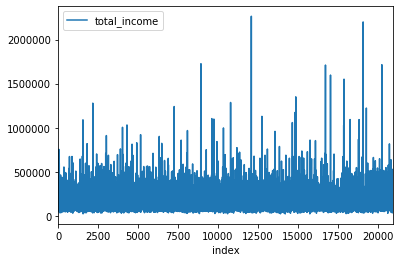

In [108]:
dataForPlot=data.reset_index()
dataForPlot.plot(x='index',y='total_income')

In [109]:

def sliplitIncome(row):
    if row['total_income']<low_income:
        return "низкий"
    if row['total_income']>high_income:
        return "высокий"
    else:
        return "средний"
    
data['total_income_type']=data.apply(sliplitIncome,axis=1)

In [110]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,lemmas,total_income_type
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,23,жилье,высокий
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,11,автомобиль,средний
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,15,жилье,средний
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,11,образование,высокий
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,38,свадьба,средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20952,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,12,жилье,высокий
20953,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,39,автомобиль,средний
20954,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,5,недвижимость,низкий
20955,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,8,автомобиль,высокий


### Вывод

Добавляем словарь с доходом населения: то что левее 25% квантиля - низкий доход, высокий доход - то что правее 75% квантиля. Это поможет разделить население по уровню дохода 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Категоризация проведена верно

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [85]:
grouped_data_by_children=data.groupby('children').agg({'debt':['count','sum']})
grouped_data_by_children['ratio']=grouped_data_by_children['debt']['sum']/grouped_data_by_children['debt']['count']
#print(grouped_data_by_children)


pivot_table_by_children=pd.pivot_table(data, index=['children'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_children['ratio']=pivot_table_by_children['sum']['debt']/pivot_table_by_children['count']['debt']
pivot_table_by_children

,count,sum,ratio
,debt,debt,
children,,,
0,13748,1039,0.075575
1,4734,436,0.092100
2,2027,192,0.094721
3,324,26,0.080247
4,40,4,0.100000
5,9,0,0.000000
20,75,8,0.106667


### Вывод

- семьи, в которых нет детей, реже всего задерживают платёж по кредиту
- с увеличением количества детей имеется тенденция увеличения количества просроченных кредитов
- в случае семей с 3 детьми наблюдается ситуация увеличения вероятности вовремя выплатить кредит (возможно слишком мало данных или материнский капитал реально тащит)
- по семьям, в которых 5 детей, недостаточно информации и требуются соответствующие уточнения

К тому же необходимы уточненния по-поводу выгрузки данных из сети по количеству детей. Если анамальному значению -1 соответствуют семьи с 1 ребёнком, то необходимо сделать соответствующие изменения в проекте

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [86]:
grouped_data_by_family=data.groupby('family_status').agg({'debt':['count','sum']})
grouped_data_by_family['ratio']=grouped_data_by_family['debt']['sum']/grouped_data_by_family['debt']['count']
#grouped_data_by_family

pivot_table_by_family=pd.pivot_table(data, index=['family_status'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_family['ratio']=pivot_table_by_family['sum']['debt']/pivot_table_by_family['count']['debt']
pivot_table_by_family

,count,sum,ratio
,debt,debt,
family_status,,,
в разводе,1163,84,0.072227
вдовец / вдова,935,61,0.065241
гражданский брак,4046,376,0.092931
женат / замужем,12058,913,0.075717
не женат / не замужем,2755,271,0.098367


### Вывод

- Статистика показывает, что супругу(е), свойственно реже пропускать дни платежей по кредиту (возможно, наследство, оставшееся от умершего партнёра, позволяет проще планировать бюджет по статье возвращения кредитных денег)
- Парам с зарегестрированными семейными отношениями свойстве чаще соблюдать срок выплат по кредиту, чем семьям с неузаконенными отношениями.
- Люди в разводе платят по кредитам наравне с семьями, в которых узаконены семейные отношения (в случае развода и имущество и долги платятся пополам)
- Наиболее злостными неплотельщиками по кредитам являются люди без постоянного партнёра. Возможно, отсутствие финансового плеча, в виде супруга/супруги не позволяет им планировать платежи по кредиту
- Люди в гражданском браке также часто как и холостые/незамужние пропускают платежи по кредуту. Возможно таже самая причина

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [87]:
grouped_data_by_income=data.groupby('total_income_type').agg({'debt':['count','sum']})
grouped_data_by_income['ratio']=grouped_data_by_family['debt']['sum']/grouped_data_by_family['debt']['count']
#grouped_data_by_income

pivot_table_by_income=pd.pivot_table(data, index=['total_income_type'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_income['ratio']=pivot_table_by_income['sum']['debt']/pivot_table_by_income['count']['debt']
pivot_table_by_income

,count,sum,ratio
,debt,debt,
total_income_type,,,
высокий,5239,377,0.071960
низкий,5239,419,0.079977
средний,10479,909,0.086745


### Вывод

- Людям с высокими доходами не свойственно пропускать платежи по кредиту (возможно, во-первых, они боятся за свой авторитет и имидж, а во-вторых, умеют планировать бюджет)
- Люди с низким доходом также пытаются вовремя платить по креду (возможно, опасаются приставов, арестов имущества и штрафов (пени) за просрочку)

- Как разные цели кредита влияют на его возврат в срок?

In [88]:
grouped_data_by_purpose=data.groupby('lemmas').agg({'debt':['count','sum']})
grouped_data_by_purpose['ratio']=grouped_data_by_family['debt']['sum']/grouped_data_by_family['debt']['count']
#grouped_data_by_purpose

pivot_table_by_purpose=pd.pivot_table(data, index=['lemmas'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_purpose['ratio']=pivot_table_by_purpose['sum']['debt']/pivot_table_by_purpose['count']['debt']
pivot_table_by_purpose

,count,sum,ratio
,debt,debt,
lemmas,,,
автомобиль,4210,393,0.093349
жилье,3763,267,0.070954
коммерческий,1281,97,0.075722
недвижимость,4919,369,0.075015
образование,3927,367,0.093456
ремонт,597,35,0.058626
свадьба,2260,177,0.078319


### Вывод

- кредиты на автомобили и образование чаще остальных оплачиваются с просрочкой. Возможно причина в том, что данные категории товаров являются долгоокупаемыми.
- кредиты на оплату ремонта, чаще остальных оплачиваются вовремя. Возможно необходимость планирования денег, ресурсов и в времени заставляет людей более серьёзно относиться к оплате кредитов
- кредиты на жильё, комерческую недвижимость и жилую недвижимость (возможно второе или третье) и свадьбу имеют примерно одинаковую вероятность быть оплаченными вовремя. Однако кредит на жильё (ипотека на единственное жильё), как правило, чаще остальных из данной группы оплачивается вовремя

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Выводы все правильные, молодец, но задание лучше было бы выполнить используя сводные таблицы


Надеюсь сейчас правильно написал

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Все выводы верны, код написан правильно, радует, что используешь сводные таблицы)


### Шаг 4. Общий вывод

In [119]:
#fill_grouped_data.mean().describe()
#Цели в процентах
print(purpose/purpose.sum()*100)

недвижимость    23.471871
автомобиль      20.088753
образование     18.738369
жилье           17.955814
свадьба         10.783986
коммерческий     6.112516
ремонт           2.848690
Name: lemmas, dtype: float64


В ходе исследования надёжности заёмщиков были определены категории граждан, которые в большей степени склонны вовремя платить по кредитным займам

Исходные данные содержали множество аномальных значений. Среди 21525 записей о клиентах было выявлено:
- 2174 записи в которых остуствовали значения в графах общий трудовой стаж и ежемесячный доход (преимущественно отсутствовали записи 
- 71 повторяющаяся запись;
- 1 запись, в которой отсутствовал пол клиента (запись удалена из финального набора данных)
- 47 записей с количеством детей, равным -1
- 76 записей с количеством детей, равным 20

Заполнение пустых значений осуществлялось по следующей методике. Из генеральной совокупности данных производилась выборка строк, в которых нет пустых атрибутов. Данная выборка группировалось по типу работников и создавалась новая таблица в которой содержалась информация о максимальных и минимальных значениях по столбцам трудового стажа и дохода. На основании того, что в таблице разброс между максимумов и минимумом велик (для стажа СКО=170 237 дней/часов, а для дохода 136060 рублей), было принято решения заполнять по средним значениями для каждой категории (среднее по всем категориям 89897 дней и 181794 рублей). 
Все повторяющиеся записи были удалены. Предполагаемая причина их появления - один и тот же клиент с одним и тем же заявлением несколько раз был занесён в БД.
Для записей, у которых количество детей равно -1 было принято решения заменить на 0. Записи, в которых количество детей равно 20 остались без изменений. Фактическую природу этих данных необходимо уточнить. Возможно 20 детей соответствует записи с 2 детьми, а -1 - 1.

При последующих выгрузках из данной базы (баз) следует уделить внимание к таким параметрам как:
- уровень образования
- общий трудовой стаж
В столбце уровень образовани было обнаружено 1093 записей с буквами в верхнем регистре. Столбец с струдовым стажем, помимо обозначенных выше проблем с отсутсвующими значениями, содержит множество строк (15906) с отрицательными значениями. В рамках данного анализа данных отрицательные значения были взяты по модулю, однако следует уточнить истинную природу данной ошибки.
Также при анализе данных была обнаружено, что у некоторых клиенттов общий трудовой стаж (его размерность по условию исчисляется в днях) больше возраста клиента в десятки раз. Для устранения данной ошибки в анализе было принято следующие преобразование: для клиентов, у которых разница между стажем в годах и фактическим возрастом меньше 10, размерность указана в часах. Как показывает анализ данных, неверный формат записи о стаже указан неправильно для пенсионеров (3836) и безработных (2)

Наиболее частым целями на кредит среди представляенных записей являются:
- недвижимость    23%
- автомобиль      20%
- образование     19%
- жилье           18%
- свадьба         11%
- коммерческий     6%
- ремонт           3%

Наиболее предпочтительное кредитуемое лицо - это вдовец/вдова (6,52%), у которого нет детей (7,55%), доход больше 196 тыс. руб (7,19%) и цель его кредита - сделать ремонт в квартире (5,86%). В скобках указана вероятность просрочки по кредитному платежу 



<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Требуется написать общий вывод из проделанной работы со всеми результатами и гипотезами, которые были выведены в результате.Так же в выводе можешь указать рекомендации по использованию данного анализа в будущем и так же можно приветси цифры, полученные в ходе работы, для большей наглядности


Лучше?

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Намного лучше!) Точные и обоснованные выводы, супер)

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Работа хорошая, но стоит исправить обозначенные неточности, буду ждать исправленный вариант, удачи!)


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить и начать чаще применять конструкцию try-except в решении задачи — это улучшит отказоустойчивость кода и обезопасит код от поломок в будущем, а так же изучить средства для построения изображений в Python для более глубокого понимания данных.
#### Выводы

У тебя отлично получается анализировать сложные данные, выдвигать корректные гипотезы и проверять свои выводы на возможность соответствия реальности. Видно глубокое понимание сути проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, так держать!)
Работа принята!) Очень рад, что у тебя всё получилось и надеюсь тебе понравится весь курс, будь усерден и у тебя всё получится! Удачи в будущих проектах)


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>
Работа принята!) Очень рад, что у тебя всё получилось и надеюсь тебе понравится весь курс, будь усерден и у тебя всё получится! Удачи в будущих проектах)